## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: http://archive.ics.uci.edu/ml/datasets/TV+News+Channel+Commercial+Detection+Dataset

Se trata de un dataset con un conjunto de datos de anuncios de televisión. El dataset consta de características audiovisuales estándar de tomas de video extraídas de 150 horas de transmisión de noticias de televisión de 3 canales de noticias indios y 2 internacionales (30 horas cada uno).

El dataset original está en formato LibSVM. Puedes leer más sobre este formato aquí: https://github.com/andribas404/libsvm2csv y aquí: https://github.com/cjlin1/libsvm

Necesitamos transformar de LibSVM a CSV. El formato LibSVM es de la siguiente manera:

label index1:value1 index2:value2...

Para facilitar el desarrollo de la actividad, se ha hecho un preprocesamiento del dataset, y se proporciona como archivo adjunto en la tarea un fichero CSV con el dataset completo. Debes descargar el fichero con el siguiente nombre: 'TV_News_Channel_Commercial_Detection_Dataset.csv'.

El objetivo de la clasificación será detectar si la toma de vídeo es un anuncio o no.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# se carga el dataset
df = pd.read_csv('TV_News_Channel_Commercial_Detection_Dataset.csv')

### ¿Cuántas instancias de datos tiene el dataset?

In [4]:
n_instancias = df.shape[0]
print(f"Número de instancias: {n_instancias}")

Número de instancias: 17720


_Número de instancias: 17720_

### ¿Cuántas variables continuas hay en el dataset?

In [5]:
target_candidates = ['liked', 'class']
target_col = next((col for col in target_candidates if col in df.columns), None)

numeric_cols = df.select_dtypes(include=[np.number]).columns
continuous_cols = numeric_cols.drop(target_col) if (target_col and target_col in numeric_cols) else numeric_cols

n_continuas = len(continuous_cols)
print(f"Número de variables continuas: {n_continuas}")

Número de variables continuas: 4125


_Número de variables continuas: 4125_

### ¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

In [7]:
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if target_col and target_col not in categorical_cols:
    categorical_cols.append(target_col)

categorical_cols = pd.Index(categorical_cols)
categorias = {col: sorted(df[col].unique()) for col in categorical_cols}

print(f"Número de variables categóricas: {len(categorical_cols)}")
for col, valores in categorias.items():
    print(f"{col}: {valores}")

Número de variables categóricas: 1
class: [np.int64(-1), np.int64(1)]


### ¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

Distribución de la variable 'class':
class
-1    9304
 1    8416
Name: count, dtype: int64

Porcentaje por clase:
class
-1    52.505643
 1    47.494357
Name: proportion, dtype: float64


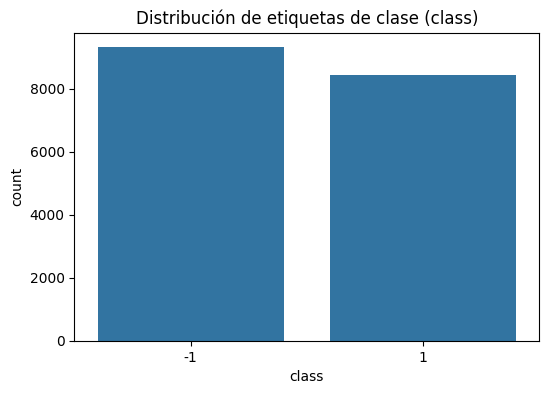

Conclusión: El dataset está razonablemente balanceado.


In [8]:
# Calculate the count and percentage of each class
class_counts = df[target_col].value_counts()
class_percentages = df[target_col].value_counts(normalize=True) * 100

print(f"Distribución de la variable '{target_col}':")
print(class_counts)
print("\nPorcentaje por clase:")
print(class_percentages)

# Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title(f'Distribución de etiquetas de clase ({target_col})')
plt.show()

# Check for balance (simple heuristic)
if class_percentages.min() < 40:
    print("Conclusión: El dataset no está balanceado (una clase tiene menos del 40% de representación).")
else:
    print("Conclusión: El dataset está razonablemente balanceado.")

In [ ]:
### PON AQUÍ TU CÓDIGO

_indica aquí tu respuesta_

¿Existen valores nulos o perdidos en el dataset?

In [ ]:
### PON AQUÍ TU CÓDIGO

_indica aquí tu respuesta_

Visualiza la matriz de correlaciones, o una parte de ella. 

_Nota: son 4126 features, calcular la matriz de correlaciones de todas, puede suponer mucho tiempo de cómputo. Puedes seleccionar un subconjunto de las mismas para simplificar._

In [ ]:
### PON AQUÍ TU CÓDIGO

¿Existe alguna variable altamente correlacionada con la variable de clase?

In [ ]:
## indica aquí tu respuesta

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

In [ ]:
### PON AQUÍ TU CÓDIGO

_indica aquí tu respuesta_

In [ ]:
# Separamos los datos en los conjuntos de entrenamiento y test.

X, y = df.drop('liked',axis=1),df['liked']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

In [ ]:
### PON AQUÍ EL CÓDIGO DE LA NORMALIZACIÓN SI CONSIDERAS NECESARIO REALIZARLO

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [ ]:
### PON AQUÍ TU CÓDIGO

In [ ]:
### PON AQUÍ TU CÓDIGO

In [ ]:
### PON AQUÍ TU CÓDIGO

Visualiza la matriz de confusión del modelo con 20 árboles.

In [ ]:
### PON AQUÍ TU CÓDIGO

¿Cuántos ejemplos ha clasificado correctamente?

_indica aquí tu respuesta_

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para ambas clases?

_indica aquí tu respuesta_

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Support Vector Machine**

In [ ]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

In [ ]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [ ]:
### PON AQUÍ TU CÓDIGO

In [ ]:
### PON AQUÍ TU CÓDIGO

In [ ]:
### PON AQUÍ TU CÓDIGO

In [ ]:
### PON AQUÍ TU CÓDIGO

Visualiza tres matrices de confusión de tres modelos con diferentes valores de C.

In [ ]:
### PON AQUÍ TU CÓDIGO

¿Cuántos ejemplos ha clasificado correctamente cada uno de los tres modelos?

_indica aquí tu respuesta_

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision?

In [ ]:
## PON AQUÍ TU CÓDIGO

_indica aquí tu respuesta_

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.